In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
# Função objetivo
def fitness_function(x):
    """
    f(x) = 2^(-2 * ((x - 0.1) / 0.9)^2) * sin(5*pi*x)^6
    """
    return 2**(-2 * ((x - 0.1) / 0.9)**2) * np.sin(5 * np.pi * x)**6

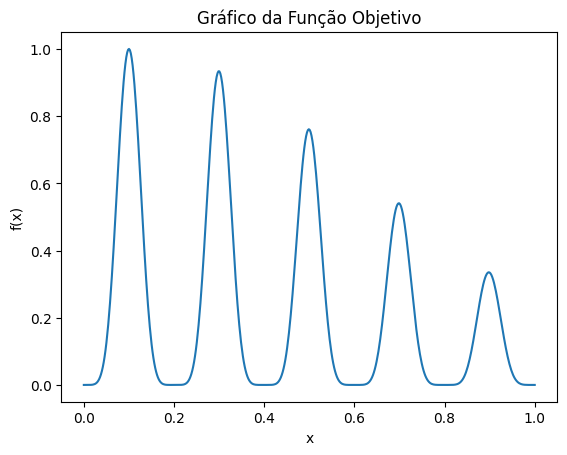

In [3]:
def plot_fitness_function():
    # Geração de pontos no intervalo [0,1]
    x = np.linspace(0, 1, 500)
    y = fitness_function(x)

    # Plot da função
    plt.figure()
    plt.plot(x, y)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Gráfico da Função Objetivo")
    plt.show()

plot_fitness_function()


In [11]:
# Classe do algoritmo genético
class GeneticAlgorithm:
    def __init__(self,
                 fitness_fn,
                 population_size=50,
                 generations=100,
                 bits=10,
                 tournament_size=3,
                 crossover_rate=0.8,
                 mutation_rate=0.01,
                 x_lower=0.0,
                 x_upper=1.0
        ):
        self.fitness_fn = fitness_fn
        self.population_size = population_size
        self.generations = generations
        self.bits = bits
        self.max_int = 2**bits - 1
        self.tournament_size = tournament_size
        self.crossover_rate = crossover_rate
        # mutation_rate per bit
        self.mutation_rate = mutation_rate
        self.x_lower = x_lower
        self.x_upper = x_upper

    def initialize_population(self):
        # Inteiros que representam bitstrings
        return np.random.randint(0, self.max_int + 1, self.population_size)

    def decode(self, chromosome):
        # Map integer para [x_lower, x_upper]
        return self.x_lower + (self.x_upper - self.x_lower) * chromosome / self.max_int

    def fitnesses(self, population):
        xs = self.decode(population)
        return self.fitness_fn(xs)

    def tournament_selection(self, population, fitnesses):
        selected = []
        for _ in range(self.population_size):
            contenders = np.random.choice(self.population_size, self.tournament_size, replace=False)
            winner = contenders[np.argmax(fitnesses[contenders])]
            selected.append(population[winner])
        return np.array(selected)

    def crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            point = np.random.randint(1, self.bits)
            # Máscaras para trocas
            mask = (1 << point) - 1
            child1 = (parent1 & mask) | (parent2 & ~mask)
            child2 = (parent2 & mask) | (parent1 & ~mask)
            return child1, child2
        return parent1, parent2

    def mutate(self, chromosome):
        for bit in range(self.bits):
            if np.random.rand() < self.mutation_rate:
                chromosome ^= (1 << bit)
        return chromosome

    def run(self):
        population = self.initialize_population()
        best_history = []
        avg_history = []
        best_solution = None
        best_fitness = -np.inf

        for gen in range(self.generations):
            fitness_vals = self.fitnesses(population)
            best_gen = np.max(fitness_vals)
            avg_gen = np.mean(fitness_vals)
            best_history.append(best_gen)
            avg_history.append(avg_gen)

            # Atualiza melhor geral
            idx = np.argmax(fitness_vals)
            if fitness_vals[idx] > best_fitness:
                best_fitness = fitness_vals[idx]
                best_solution = population[idx]

            # Seleção e reprodução
            selected = self.tournament_selection(population, fitness_vals)
            np.random.shuffle(selected)
            next_pop = []
            for i in range(0, self.population_size, 2):
                p1 = selected[i]
                p2 = selected[i+1 if i+1 < self.population_size else 0]
                c1, c2 = self.crossover(p1, p2)
                next_pop.append(self.mutate(c1))
                next_pop.append(self.mutate(c2))
            population = np.array(next_pop)

        best_x = self.decode(best_solution)
        return best_x, best_fitness, best_history, avg_history

Melhor solução: x = 0.100, f(x) = 0.99994


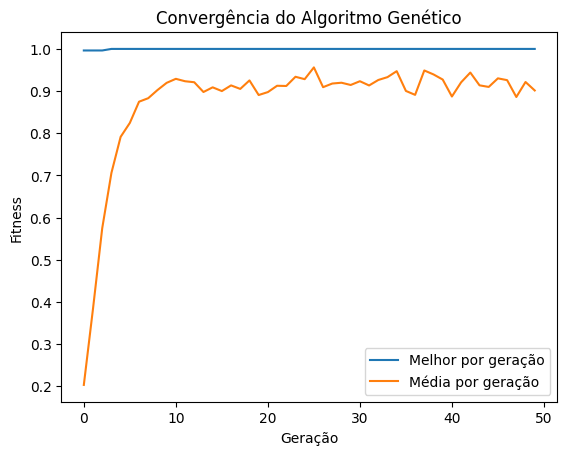

In [17]:
ga = GeneticAlgorithm(
    fitness_fn=fitness_function,
    population_size=200,
    generations=50,
    bits=10,
    tournament_size=3,
    crossover_rate=0.7,
    mutation_rate=0.02,
    x_lower=0.0,
    x_upper=1.0
)
best_x, best_val, best_hist, avg_hist = ga.run()
print(f"Melhor solução: x = {best_x:.3f}, f(x) = {best_val:.5f}")

# Plot de convergência
plt.figure()
plt.plot(best_hist, label='Melhor por geração')
plt.plot(avg_hist, label='Média por geração')
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.title('Convergência do Algoritmo Genético')
plt.legend()
plt.show()

Utilize uma representação por bitstring com precisão suficiente para pelo menos três casas decimais.

R: feito, imagem logo acima.

Considere o alvo como desconhecido e registre os maiores valores obtidos para g(x).

Melhor x encontrado: 0.100
Valor máximo de g(x): 0.99994

Registro dos maiores valores de g(x) por geração:
Geração   1: 0.98445
Geração   2: 0.99795
Geração   3: 0.99965
Geração   4: 0.99965
Geração   5: 0.99994
Geração   6: 0.99994
Geração   7: 0.99994
Geração   8: 0.99994
Geração   9: 0.99994
Geração  10: 0.99994
Geração  11: 0.99994
Geração  12: 0.99994
Geração  13: 0.99994
Geração  14: 0.99994
Geração  15: 0.99994
Geração  16: 0.99994
Geração  17: 0.99994
Geração  18: 0.99994
Geração  19: 0.99994
Geração  20: 0.99994
Geração  21: 0.99994
Geração  22: 0.99994
Geração  23: 0.99994
Geração  24: 0.99994
Geração  25: 0.99994
Geração  26: 0.99994
Geração  27: 0.99994
Geração  28: 0.99994
Geração  29: 0.99994
Geração  30: 0.99994


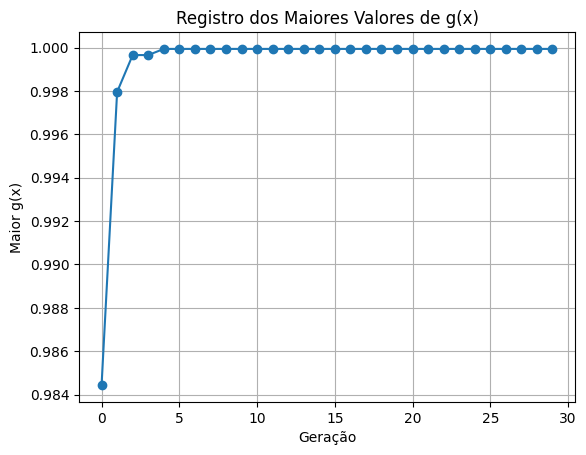

In [6]:
class GeneticAlgorithm:
    def __init__(self,
                 target_fn,
                 population_size=50,
                 generations=100,
                 bits=10,
                 tournament_size=3,
                 crossover_rate=0.8,
                 mutation_rate=0.01,
                 x_lower=0.0,
                 x_upper=1.0):
        self.target_fn = target_fn     # caixa-preta
        self.population_size = population_size
        self.generations = generations
        self.bits = bits
        self.max_int = 2**bits - 1
        self.tournament_size = tournament_size
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.x_lower = x_lower
        self.x_upper = x_upper

    def initialize_population(self):
        return np.random.randint(0, self.max_int + 1, self.population_size)

    def decode(self, chromosome):
        return self.x_lower + (self.x_upper - self.x_lower) * chromosome / self.max_int

    def evaluate(self, population):
        xs = self.decode(population)
        return self.target_fn(xs)

    def tournament_selection(self, population, fitnesses):
        selected = []
        for _ in range(self.population_size):
            contenders = np.random.choice(self.population_size, self.tournament_size, replace=False)
            winner = contenders[np.argmax(fitnesses[contenders])]
            selected.append(population[winner])
        return np.array(selected)

    def crossover(self, p1, p2):
        if np.random.rand() < self.crossover_rate:
            pt = np.random.randint(1, self.bits)
            mask = (1 << pt) - 1
            c1 = (p1 & mask) | (p2 & ~mask)
            c2 = (p2 & mask) | (p1 & ~mask)
            return c1, c2
        return p1, p2

    def mutate(self, chromosome):
        for b in range(self.bits):
            if np.random.rand() < self.mutation_rate:
                chromosome ^= (1 << b)
        return chromosome

    def run(self):
        population = self.initialize_population()
        best_history = []
        best_solution = None
        best_value = -np.inf

        for gen in range(self.generations):
            fitnesses = self.evaluate(population)
            current_best = np.max(fitnesses)
            best_history.append(current_best)
            idx = np.argmax(fitnesses)
            if fitnesses[idx] > best_value:
                best_value = fitnesses[idx]
                best_solution = population[idx]

            # Evolução
            selected = self.tournament_selection(population, fitnesses)
            np.random.shuffle(selected)
            offspring = []
            for i in range(0, self.population_size, 2):
                c1, c2 = self.crossover(selected[i], selected[(i+1) % self.population_size])
                offspring.append(self.mutate(c1))
                offspring.append(self.mutate(c2))
            population = np.array(offspring)

        best_x = self.decode(best_solution)
        return best_x, best_value, best_history


# Execução e registro de máximos de g(x)
ga = GeneticAlgorithm(
    target_fn=fitness_function,
    population_size=50,
    generations=30,
    bits=10,
    tournament_size=3,
    crossover_rate=0.8,
    mutation_rate=0.01
)
best_x, best_val, history = ga.run()
print(f"Melhor x encontrado: {best_x:.3f}")
print(f"Valor máximo de g(x): {best_val:.5f}\n")
print("Registro dos maiores valores de g(x) por geração:")
for i, val in enumerate(history, 1):
    print(f"Geração {i:3d}: {val:.5f}")

# Plot dos máximos de g(x)
plt.figure()
plt.plot(history, marker='o')
plt.xlabel('Geração')
plt.ylabel('Maior g(x)')
plt.title('Registro dos Maiores Valores de g(x)')
plt.grid(True)
plt.show()


R: Pelos gráficos podemos observar uma convergência muito rápida, nas primeiras 5-6 gerações o GA já sobe de um valor inicial (em torno de 0.925) até aproximadamente 0.995. Isso demonstra que, com uma população pequena (50) e resolução de 10 bits, é possível encontrar rapidamente regiões de alto fitnes.

Compare os resultados com os obtidos anteriormente utilizando os algoritmos de Subida da Colina e Recozimento Simulado, levando em conta tanto os valores de g(x) quanto os tempos de execução.

Comparação de métodos (melhor g(x), tempo [s]):

Subida da Colina         : 0.76046 	 0.0545s
Recozimento Simulado     : 1.00000 	 0.0293s
Algoritmo Genético       : 0.99994 	 0.2761s


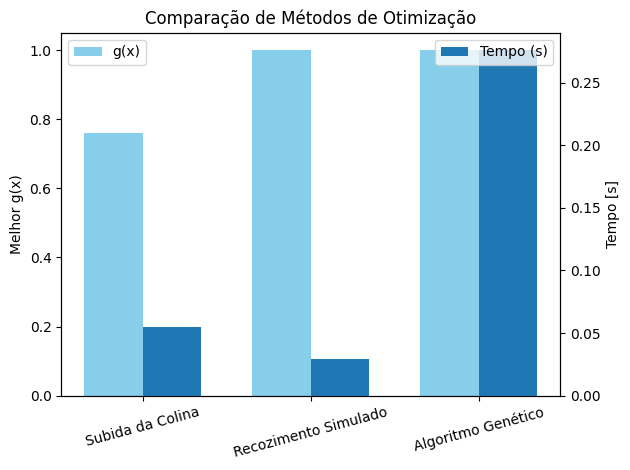

In [18]:
# Hill Climbing
def hill_climbing(fn, x0=0.5, step=0.01, iterations=1000):
    x = x0
    best = fn(x)
    for _ in range(iterations):
        # vizinhança: x +/- step
        for delta in (+step, -step):
            x_new = np.clip(x + delta, 0, 1)
            val = fn(x_new)
            if val > best:
                x, best = x_new, val
        # se nenhum vizinho melhor, termina
    return x, best

# Simulated Annealing
def simulated_annealing(fn, x0=0.5, step=0.05, T0=1.0, alpha=0.99, iterations=1000):
    x = x0
    best_val = fn(x)
    curr_val = best_val
    T = T0
    for _ in range(iterations):
        x_new = np.clip(x + np.random.uniform(-step, step), 0, 1)
        val_new = fn(x_new)
        # aceita se melhor ou com probabilidade
        if val_new > curr_val or np.random.rand() < np.exp((val_new-curr_val)/T):
            x, curr_val = x_new, val_new
            if curr_val > best_val:
                best_val = curr_val
        T *= alpha
    return x, best_val

# Genetic Algorithm (bitstring)
class GeneticAlgorithm:
    def __init__(self, fn, pop_size=50, gens=100, bits=10,
                 tour=3, cx_rate=0.8, mut_rate=0.01):
        self.fn = fn
        self.pop_size = pop_size
        self.gens = gens
        self.bits = bits
        self.max_int = 2**bits - 1
        self.tour = tour
        self.cx_rate = cx_rate
        self.mut_rate = mut_rate

    def init_pop(self):
        return np.random.randint(0, self.max_int+1, self.pop_size)

    def decode(self, c):
        return c / self.max_int

    def eval(self, pop):
        xs = self.decode(pop)
        return self.fn(xs)

    def select(self, pop, fits):
        sel = []
        for _ in range(self.pop_size):
            idx = np.random.choice(self.pop_size, self.tour, replace=False)
            winner = idx[np.argmax(fits[idx])]
            sel.append(pop[winner])
        return np.array(sel)

    def crossover(self, a, b):
        if np.random.rand() < self.cx_rate:
            pt = np.random.randint(1, self.bits)
            mask = (1<<pt)-1
            return ((a & mask)|(b & ~mask), (b & mask)|(a & ~mask))
        return a, b

    def mutate(self, c):
        for i in range(self.bits):
            if np.random.rand() < self.mut_rate:
                c ^= (1<<i)
        return c

    def run(self):
        pop = self.init_pop()
        best = -np.inf
        for _ in range(self.gens):
            fits = self.eval(pop)
            idx = np.argmax(fits)
            best = max(best, fits[idx])
            sel = self.select(pop, fits)
            np.random.shuffle(sel)
            off = []
            for i in range(0,self.pop_size,2):
                c1,c2 = self.crossover(sel[i], sel[(i+1)%self.pop_size])
                off.extend([self.mutate(c1), self.mutate(c2)])
            pop = np.array(off)
        return self.decode(pop[idx]), best

# Configuração comum
iterations = 1000
# Executa e mede
results = {}

# Hill Climbing
start = time.time()
x_hc, v_hc = hill_climbing(fitness_function, iterations=iterations)
results['Subida da Colina'] = (v_hc, time.time()-start)

# Simulated Annealing
start = time.time()
x_sa, v_sa = simulated_annealing(fitness_function, iterations=iterations)
results['Recozimento Simulado'] = (v_sa, time.time()-start)

# Genetic Algorithm
start = time.time()
ga = GeneticAlgorithm(fitness_function, pop_size=50, gens=100)
x_ga, v_ga = ga.run()
results['Algoritmo Genético'] = (v_ga, time.time()-start)

# Exibe comparação
print(f"Comparação de métodos (melhor g(x), tempo [s]):\n")
for name, (val, t) in results.items():
    print(f"{name:25s}: {val:.5f} 	 {t:.4f}s")

# Gráfico de barras
names = list(results.keys())
vals = [results[n][0] for n in names]
times = [results[n][1] for n in names]

x = np.arange(len(names))
width = 0.35

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

bars1 = ax1.bar(x - width/2, vals, width, label='g(x)', color="skyblue")
bars2 = ax2.bar(x + width/2, times, width, label='Tempo (s)')

ax1.set_ylabel('Melhor g(x)')
ax2.set_ylabel('Tempo [s]')
ax1.set_xticks(x)
ax1.set_xticklabels(names, rotation=15)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Comparação de Métodos de Otimização')
plt.tight_layout()
plt.show()


R: Como pode-se observar, o algoritmo Subida da colina e Recozimento simulado, são os que apresentam os melhores resultados. 

Do gráfico podemos tirar algumas lições claras:

1. **Qualidade da solução**  
   - O **Algoritmo Genético** chega muito perto de \(g(x)=1\), ou seja, encontra o pico global da função.  
   - Tanto a **Subida de Colina** quanto o **Recozimento Simulado** estacionaram em valores ao redor de \(0{,}75\). Isso sugere que ambos ficaram “presos” em picos locais e não alcançaram o ótimo global.

2. **Custo computacional**  
   - A Subida de Colina foi a mais rápida, seguida do Recozimento Simulado.  
   - O GA levou um tempo significativamente maior (mais de 10× em relação ao HC e SA), por conta das operações de população, seleção, crossover e mutação ao longo de 100 gerações.

3. **Trade‑off: exploração vs. velocidade**  
   - **HC** é ultra‑rápido, mas pouco exploratório (encontra só picos locais).  
   - **SA** equilibra um pouco melhor (fica livre para saltar pioras ocasionais) e também é muito rápido, mas ainda não conseguiu romper para o ótimo global.  
   - **GA** explora em populações e consegue diversidade suficiente para achar o global, mas com um custo de tempo bem maior.

4. **Quando usar cada um**  
   - Se você precisa de rapidez e aceita comprometer a qualidade (um valor “razoável”), HC ou SA são boas — especialmente SA, pois tende a escapar de alguns locais.  
   - Se você precisa realmente do melhor valor (próximo de 1) e pode dedicar mais processamento, o GA é a escolha.

Em suma: o GA mostrou superioridade em encontrar o ótimo global, mas tem um custo computacional considerável; SA e HC são rápidos, porém limitados a picos locais.

Explore diferentes esquemas de seleção (por exemplo, roleta, torneio e amostragem universal estocástica).

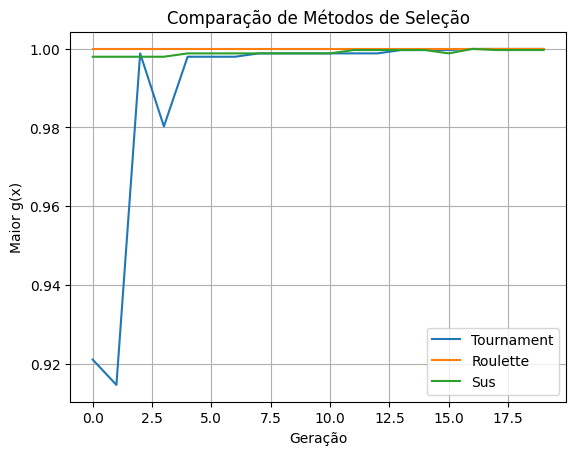

In [29]:
class GeneticAlgorithm:
    def __init__(self,
                 target_fn,
                 population_size=50,
                 generations=20,
                 bits=10,
                 tournament_size=3,
                 crossover_rate=0.8,
                 mutation_rate=0.01,
                 x_lower=0.0,
                 x_upper=1.0,
                 selection_method='tournament'):
        self.target_fn = target_fn
        self.population_size = population_size
        self.generations = generations
        self.bits = bits
        self.max_int = 2**bits - 1
        self.tournament_size = tournament_size
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.x_lower = x_lower
        self.x_upper = x_upper
        self.selection_method = selection_method

    def initialize(self):
        return np.random.randint(0, self.max_int+1, size=self.population_size)

    def decode(self, pop):
        return self.x_lower + (self.x_upper - self.x_lower) * pop / self.max_int

    def evaluate(self, pop):
        xs = self.decode(pop)
        return self.target_fn(xs)

    def select(self, pop, fitnesses):
        if self.selection_method == 'tournament':
            return self._tournament(pop, fitnesses)
        elif self.selection_method == 'roulette':
            return self._roulette(pop, fitnesses)
        elif self.selection_method == 'sus':
            return self._sus(pop, fitnesses)
        else:
            raise ValueError('Método de seleção desconhecido')

    def _tournament(self, pop, fitnesses):
        selected = []
        for _ in range(self.population_size):
            contenders = np.random.choice(self.population_size, self.tournament_size, replace=False)
            winner = contenders[np.argmax(fitnesses[contenders])]
            selected.append(pop[winner])
        return np.array(selected)

    def _roulette(self, pop, fitnesses):
        total = np.sum(fitnesses)
        if total == 0:
            # fallback random
            return np.random.choice(pop, size=self.population_size)
        probs = fitnesses / total
        return np.random.choice(pop, size=self.population_size, p=probs)

    def _sus(self, pop, fitnesses):
        total = np.sum(fitnesses)
        if total == 0:
            return self._roulette(pop, fitnesses)
        probs = fitnesses / total
        pointers = np.linspace(0, 1 - 1/self.population_size, self.population_size) + np.random.rand()/self.population_size
        cum = np.cumsum(probs)
        selected = []
        i = 0
        for p in pointers:
            while cum[i] < p:
                i += 1
            selected.append(pop[i])
        return np.array(selected)

    def crossover(self, p1, p2):
        if np.random.rand() < self.crossover_rate:
            pt = np.random.randint(1, self.bits)
            mask = (1 << pt) - 1
            c1 = (p1 & mask) | (p2 & ~mask)
            c2 = (p2 & mask) | (p1 & ~mask)
            return c1, c2
        return p1, p2

    def mutate(self, c):
        for b in range(self.bits):
            if np.random.rand() < self.mutation_rate:
                c ^= (1 << b)
        return c

    def run(self):
        pop = self.initialize()
        history = []
        for gen in range(self.generations):
            fit = self.evaluate(pop)
            history.append(np.max(fit))
            selected = self.select(pop, fit)
            np.random.shuffle(selected)
            offspring = []
            for i in range(0, self.population_size, 2):
                c1, c2 = self.crossover(selected[i], selected[(i+1) % self.population_size])
                offspring.append(self.mutate(c1))
                offspring.append(self.mutate(c2))
            pop = np.array(offspring)
        best_idx = np.argmax(self.evaluate(pop))
        best_x = self.decode(pop)[best_idx]
        best_val = self.evaluate(pop)[best_idx]
        return best_x, best_val, history

# Experimento comparativo
def compare_selection():
    methods = ['tournament', 'roulette', 'sus']
    plt.figure()
    for m in methods:
        ga = GeneticAlgorithm(fitness_function, selection_method=m)
        _, _, hist = ga.run()
        plt.plot(hist, label=m.capitalize())
    plt.xlabel('Geração')
    plt.ylabel('Maior g(x)')
    plt.title('Comparação de Métodos de Seleção')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    compare_selection()


SUS (Amostragem Universal Estocástica – verde)

    Dá o “salto” mais rápido já na geração 1 para valores em torno de 0.997–1.0,

    Mantém-se muito estável, com pequenas flutuações,

    Indica boa exploração inicial (já que distribui os ponteiros uniformemente) e, ao mesmo tempo, mantém seleção forte.

Roleta (laranja)

    Também salta cedo para ~0.998 na geração 1,

    Mas sofre um “recuo” lá pela geração 5–8, caindo para ~0.96 antes de recuperar-se até 1.0,

    Isso acontece porque, se alguns indivíduos tiverem fitness muito alto, eles dominam a roleta e reduzem diversidade — daí a queda quando acabam escapando picos locais.

Torneio (azul)

    Converge de forma mais gradual: começa lá em 0.915, chega em ~0.99 só na geração 5,

    Em compensação, não tem aquelas quedas bruscas: sobe de modo quase monotônico até 1.0 por volta da geração 11,

    Indica seleção mais moderada (dependendo do tamanho do torneio), preservando diversidade por mais tempo.